In [1]:
from pathlib import Path
from utils.default_models import ensure_default_models
from encoder import inference
from encoder import audio
import numpy as np
import pandas as pd
import os
import pickle
import matplotlib.pyplot as plt

csv_path='dataset/cv-corpus-17.0-delta-2024-03-15/en/validated.tsv'
dataset_path='dataset/cv-corpus-17.0-delta-2024-03-15/en/clips/'
embeddings_path = 'female/'

/usr/local/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/emilykuo/Desktop/CS224S/Project/Controllable_Text-to-Speech_Synthesis/encoder/audio.py:13: UserWarning: Unable to import 'webrtcvad'. This package enables noise removal and is recommended.
  warn("Unable to import 'webrtcvad'. This package enables noise removal and is recommended.")


In [3]:
df = pd.read_csv(csv_path, sep='\t')

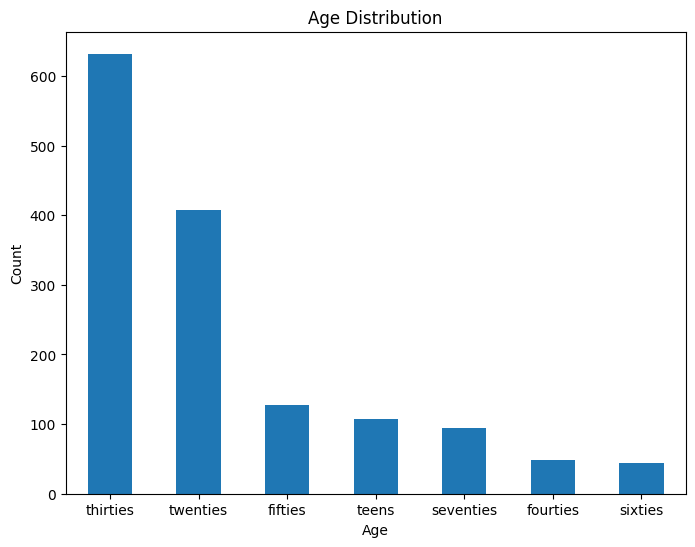

In [4]:
age_distribution = df['age'].value_counts()

plt.figure(figsize=(8, 6))
age_distribution.plot(kind='bar')

plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

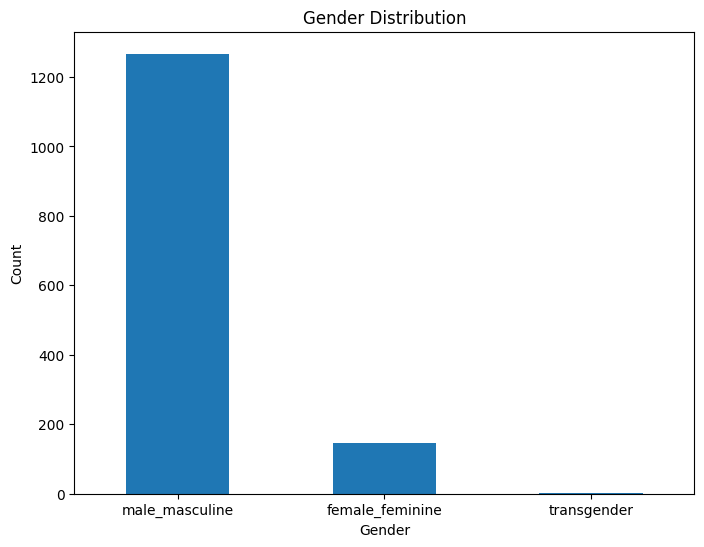

In [5]:
gender_distribution = df['gender'].value_counts()

plt.figure(figsize=(8, 6))
gender_distribution.plot(kind='bar')

plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [1]:
import generate_embeddings_commonvoice as cv
ids = cv.fetch_ids(age="fourties")
print(ids)

/usr/local/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/emilykuo/Desktop/CS224S/Project/Controllable_Text-to-Speech_Synthesis/encoder/audio.py:13: UserWarning: Unable to import 'webrtcvad'. This package enables noise removal and is recommended.
  warn("Unable to import 'webrtcvad'. This package enables noise removal and is recommended.")


['common_voice_en_39601833.mp3', 'common_voice_en_39764879.mp3', 'common_voice_en_39942522.mp3', 'common_voice_en_39942523.mp3', 'common_voice_en_39878894.mp3', 'common_voice_en_39602671.mp3', 'common_voice_en_39602675.mp3', 'common_voice_en_39594152.mp3', 'common_voice_en_39594154.mp3', 'common_voice_en_39958133.mp3', 'common_voice_en_39958136.mp3', 'common_voice_en_39958137.mp3', 'common_voice_en_40137572.mp3', 'common_voice_en_40143997.mp3', 'common_voice_en_40144011.mp3', 'common_voice_en_39652730.mp3', 'common_voice_en_39652738.mp3', 'common_voice_en_39652753.mp3', 'common_voice_en_39652759.mp3', 'common_voice_en_39652762.mp3', 'common_voice_en_39652768.mp3', 'common_voice_en_39652775.mp3', 'common_voice_en_40102953.mp3', 'common_voice_en_40102954.mp3', 'common_voice_en_40102955.mp3', 'common_voice_en_40102956.mp3', 'common_voice_en_40103003.mp3', 'common_voice_en_40103011.mp3', 'common_voice_en_40103056.mp3', 'common_voice_en_40114182.mp3', 'common_voice_en_40114263.mp3', 'common

In [3]:
path = "common_voice_en_40117514.mp3"
gender = cv.get_gender(path)
age = cv.get_age(path)
print(gender)
print(age)

male_masculine
twenties
